# Tuning SARSA agent

# Libraries

In [1]:
import os
import sys

# Get the absolute path to the parent folder
parent_folder = os.path.abspath(os.path.join(os.getcwd(), "..", os.pardir))

# Add the parent folder to sys.path if it's not already included
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

import gymnasium as gym
import numpy as np
from agents.sarsa import Sarsa
from agents.qlearning import QLearning
from policies.eps_greedy_policy import EpsGreedy
from policies.softmax_policy import Softmax

from utils.encoding import cw_encoding
from utils.utils_fct import plot_moving_averages, process_json

# Testing agent

In [2]:
env = gym.make("CliffWalking-v0", is_slippery=True, render_mode=None)

qlearning_agent = QLearning(
    encode_fct=cw_encoding,
    policy=EpsGreedy(0.01),
    nb_actions=env.action_space.n,
)

_ = qlearning_agent.train(
    env=env,
    alpha=0.1,
    gamma=1,
    policy_action_params={},
    policy_update_params={"use_glei": True},
    nb_episodes=1000,
    seed=42,
    verbose=2,
)
_ = qlearning_agent.evaluate_policy(
    env=env, policy_action_params={"hard_policy": True}, nb_episodes=10, verbose=1
)

Episode 1: Total Reward = -7379
Episode 2: Total Reward = -853
Episode 3: Total Reward = -160
Episode 4: Total Reward = -214
Episode 5: Total Reward = -406
Episode 6: Total Reward = -551
Episode 7: Total Reward = -458
Episode 8: Total Reward = -510
Episode 9: Total Reward = -433
Episode 10: Total Reward = -633
Episode 11: Total Reward = -740
Episode 12: Total Reward = -128
Episode 13: Total Reward = -43
Episode 14: Total Reward = -236
Episode 15: Total Reward = -184
Episode 16: Total Reward = -619
Episode 17: Total Reward = -379
Episode 18: Total Reward = -74
Episode 19: Total Reward = -822
Episode 20: Total Reward = -1073
Episode 21: Total Reward = -71
Episode 22: Total Reward = -105
Episode 23: Total Reward = -214
Episode 24: Total Reward = -104
Episode 25: Total Reward = -564
Episode 26: Total Reward = -469
Episode 27: Total Reward = -202
Episode 28: Total Reward = -387
Episode 29: Total Reward = -180
Episode 30: Total Reward = -439
Episode 31: Total Reward = -1075
Episode 32: Total

# $\epsilon$-Greedy Sarsa

In [2]:
env = gym.make("CliffWalking-v0", is_slippery=True, render_mode=None)

eps_greedy_qlearning = QLearning(
    encode_fct=cw_encoding,
    policy=EpsGreedy(0.01),
    nb_actions=env.action_space.n,
)

## 1. Studying the Impact of GLEI Strategy on $\epsilon$-Greedy Policy

In [3]:
glei_vs_noglei_historic = eps_greedy_qlearning.grid_search(
    env=env,
    alpha=[0.1],
    gamma=[0.1],
    policy_action_params={"epsilon": [0.001, 0.005, 0.01, 0.05, 0.1]},
    policy_update_params={"use_glei": [True, False]},
    nb_episodes=1000,
    nb_iter=10,
    verbose=0,
)

process_json(
    "../../data/cliff_walking/qlearning/eps_greedy/glei_vs_noglei",
    "w",
    data_dict=glei_vs_noglei_historic,
)

Dictionary saved to ../../data/cliff_walking/qlearning/eps_greedy/glei_vs_noglei


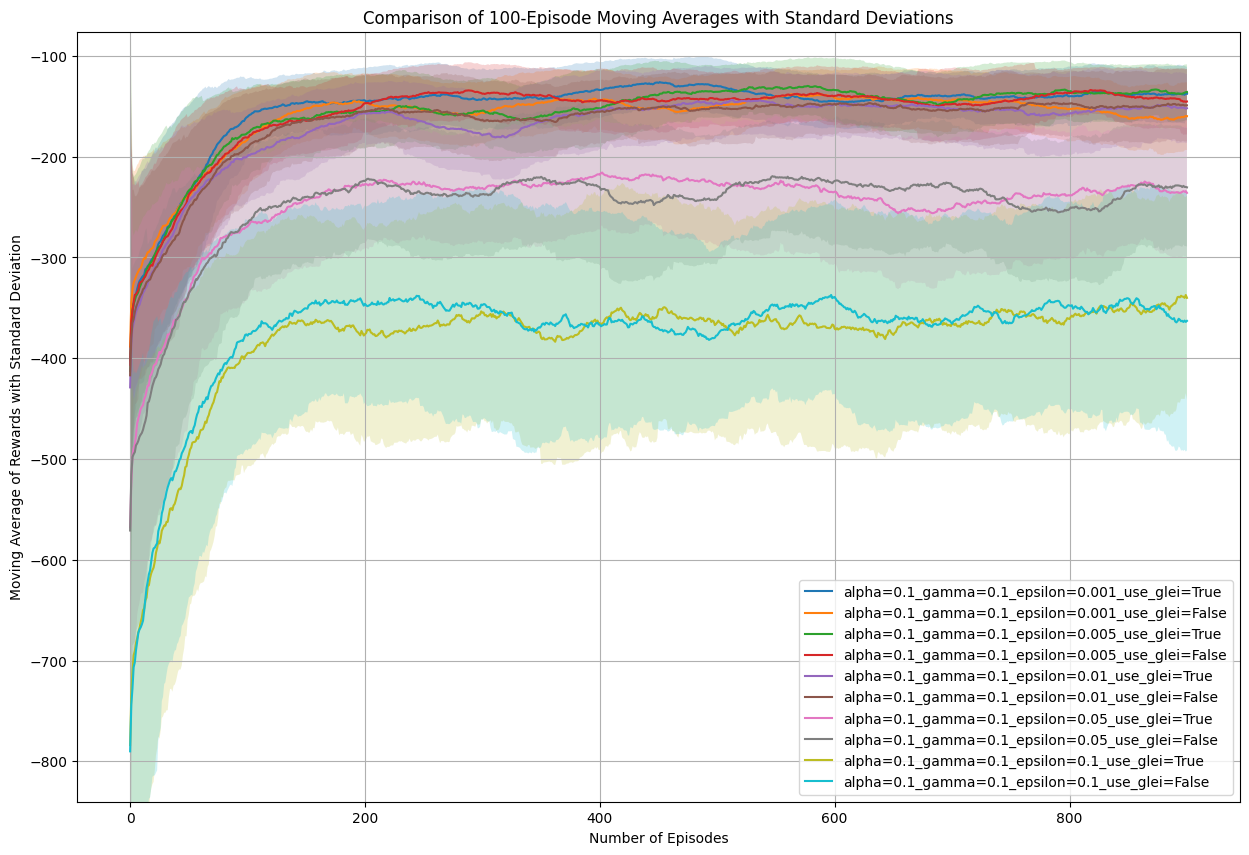

In [4]:
plot_moving_averages(
    process_json("../../data/cliff_walking/qlearning/eps_greedy/glei_vs_noglei", "r"),
    nb_episodes=1000,
    window_size=100,
)

## 2. Searching best $\alpha$ and $\gamma$

In [6]:
alpha_gamma_tune_historic = eps_greedy_qlearning.grid_search(
    env=env,
    alpha=[0.005, 0.01, 0.05, 0.07, 0.1],
    gamma=[0.9, 1],
    policy_action_params={"epsilon": [0.005]},
    policy_update_params={"use_glei": [True]},
    nb_episodes=500,
    nb_iter=10,
    verbose=0,
)

process_json(
    "../../data/mountain_car/qlearning/eps_greedy/alpha_gamma_search_epsilon=0.005_use_glei=true",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

Dictionary saved to ../../data/mountain_car/qlearning/eps_greedy/alpha_gamma_search_epsilon=0.005_use_glei=true


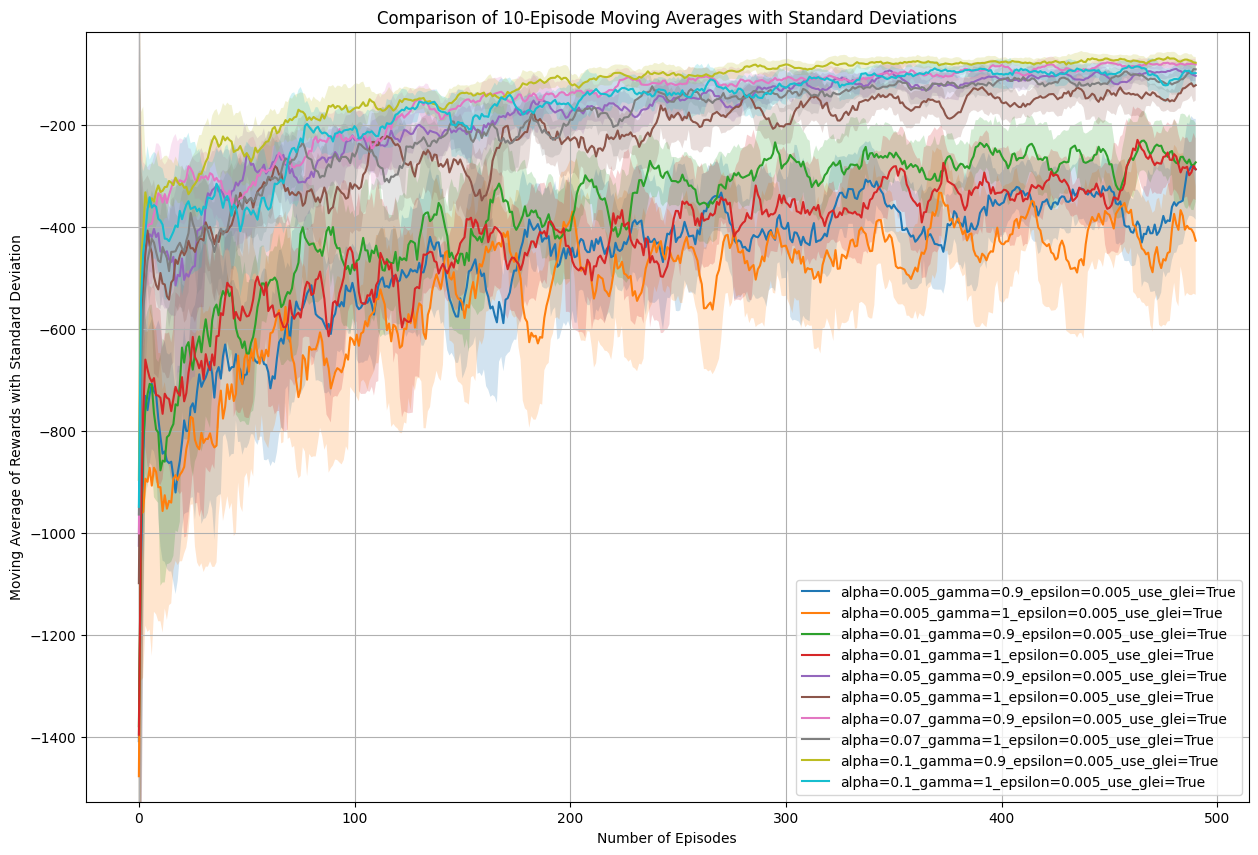

In [8]:
plot_moving_averages(
    process_json(
        "../../data/mountain_car/qlearning/eps_greedy/alpha_gamma_search_epsilon=0.005_use_glei=true",
        "r",
    ),
    nb_episodes=1000,
    window_size=10,
)

# Softmax Sarsa

In [12]:
env = gym.make("CliffWalking-v0", is_slippery=True, render_mode=None)

softmax_qlearning = QLearning(
    encode_fct=cw_encoding,
    policy=Softmax(1),
    nb_actions=env.action_space.n,
)

## 1. Searching best $\alpha$

In [14]:
alpha_gamma_tune_historic = softmax_qlearning.grid_search(
    env=env,
    alpha=[0.05, 0.1, 0.15, 0.2, 0.4],
    gamma=[1],
    policy_action_params={},
    policy_update_params={},
    nb_episodes=1000,
    nb_iter=10,
    verbose=0,
)

process_json(
    "../../data/cliff_walking/qlearning/softmax/alpha_search",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

Dictionary saved to ../../data/cliff_walking/qlearning/softmax/alpha_search


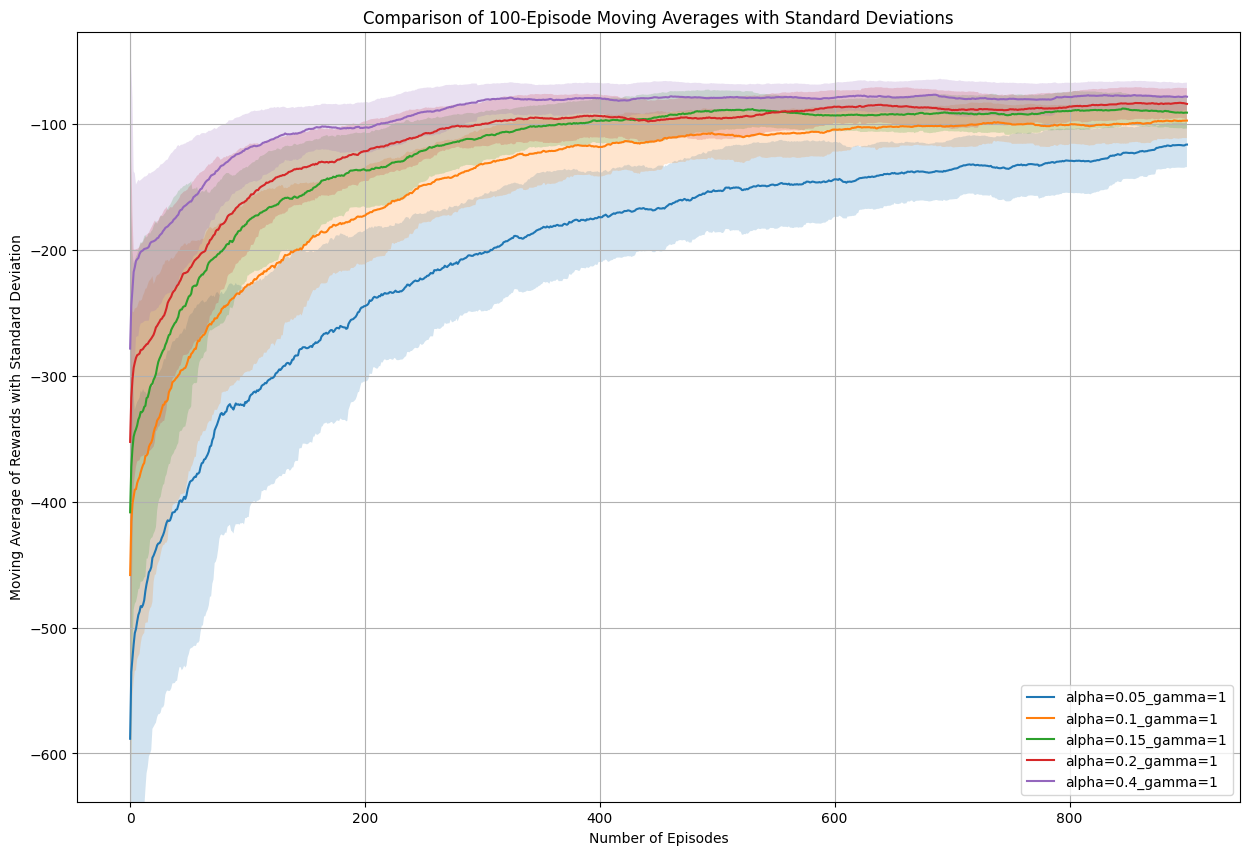

In [15]:
plot_moving_averages(
    process_json("../../data/cliff_walking/qlearning/softmax/alpha_search", "r"),
    nb_episodes=1000,
    window_size=100,
)